In [1]:
%cd ..

/media/atem/Data/HSE_videos/Project/sheaf-convolution


/media/atem/Data/HSE_videos/Project/sheaf-convolution/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [20]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from utils_comet import export_synth_exp_group_table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_NAME = "sheaf-diffusion"
WORKSPACE_NAME = "artem-d"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
df_size = export_synth_exp_group_table(WORKSPACE_NAME, PROJECT_NAME, "size_effect")
df_size.groupby(['model_name', 'dataset/num_nodes']).mean(numeric_only=True)
agg = (
    df_size.groupby(["model_name", "dataset/num_nodes"])
      .agg(
          mean_ap=("test_ap_at_best_val", "mean"),
          std_ap=("test_ap_at_best_val", "std")
      )
      .reset_index()
)

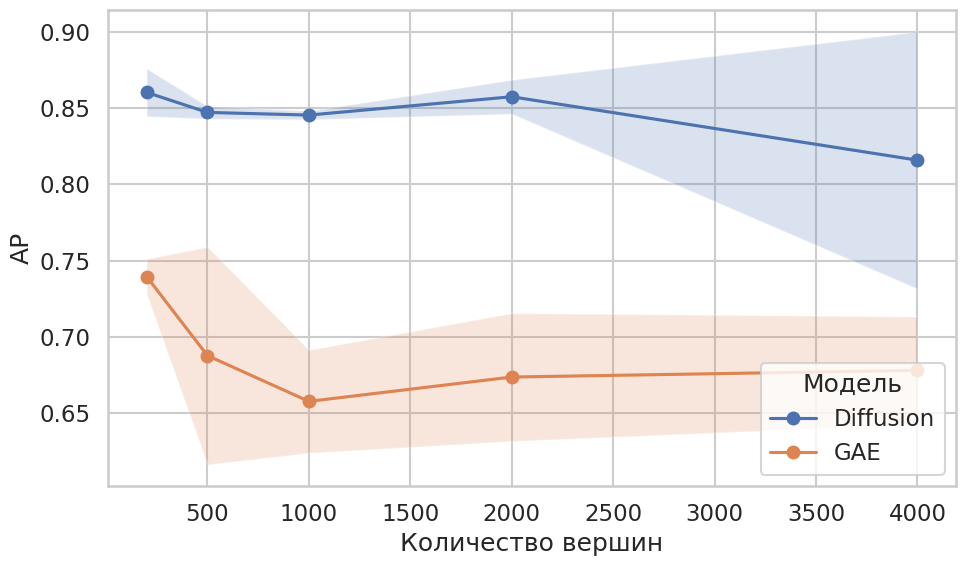

In [53]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

for model in agg["model_name"].unique():
    sub = agg[agg["model_name"] == model]
    
    # Линия среднего
    plt.plot(sub["dataset/num_nodes"], sub["mean_ap"], marker="o", label=model)
    
    # Область стандартного отклонения
    plt.fill_between(
        sub["dataset/num_nodes"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )

# plt.title("Зависимость AP от количества вершин графа", fontsize=16)
plt.xlabel("Количество вершин")
plt.ylabel("AP")
plt.legend(title="Модель", loc='lower right')
plt.tight_layout()
plt.savefig('synth_size.jpg')
plt.show()

In [55]:
df_nproj = export_synth_exp_group_table(WORKSPACE_NAME, PROJECT_NAME, "nproj_effect")
df_nproj.groupby(['model_name', 'dataset/nproj']).mean(numeric_only=True)
agg_nproj = (
    df_nproj.groupby(["model_name", "dataset/nproj"])
      .agg(
          mean_ap=("test_ap_at_best_val", "mean"),
          std_ap=("test_ap_at_best_val", "std")
      )
      .reset_index()
)

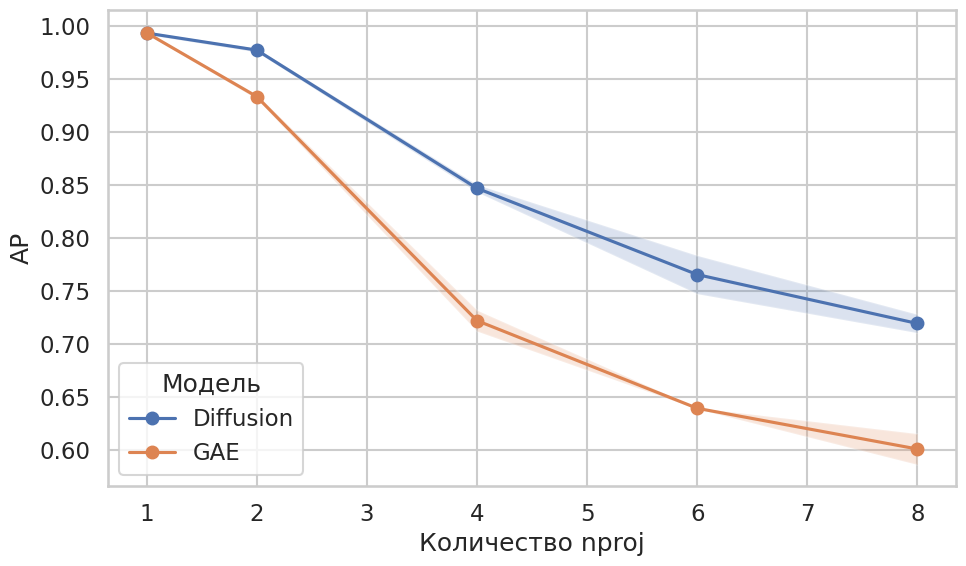

In [61]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

for model in agg_nproj["model_name"].unique():
    sub = agg_nproj[agg_nproj["model_name"] == model]
    
    # Линия среднего
    plt.plot(sub["dataset/nproj"], sub["mean_ap"], marker="o", label=model)
    
    # Область стандартного отклонения
    plt.fill_between(
        sub["dataset/nproj"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )

# plt.title("Зависимость AP от количества вершин графа", fontsize=16)
plt.xlabel("Количество nproj")
plt.ylabel("AP")
plt.legend(title="Модель", loc='lower left')
plt.tight_layout()
plt.savefig('synth_nproj.jpg')
plt.show()

In [57]:
df_dim = export_synth_exp_group_table(WORKSPACE_NAME, PROJECT_NAME, "featdim_effect")
df_dim.groupby(['model_name', 'dataset/num_features']).mean(numeric_only=True)
agg_dim = (
    df_dim.groupby(["model_name", "dataset/num_features"])
      .agg(
          mean_ap=("test_ap_at_best_val", "mean"),
          std_ap=("test_ap_at_best_val", "std")
      )
      .reset_index()
)

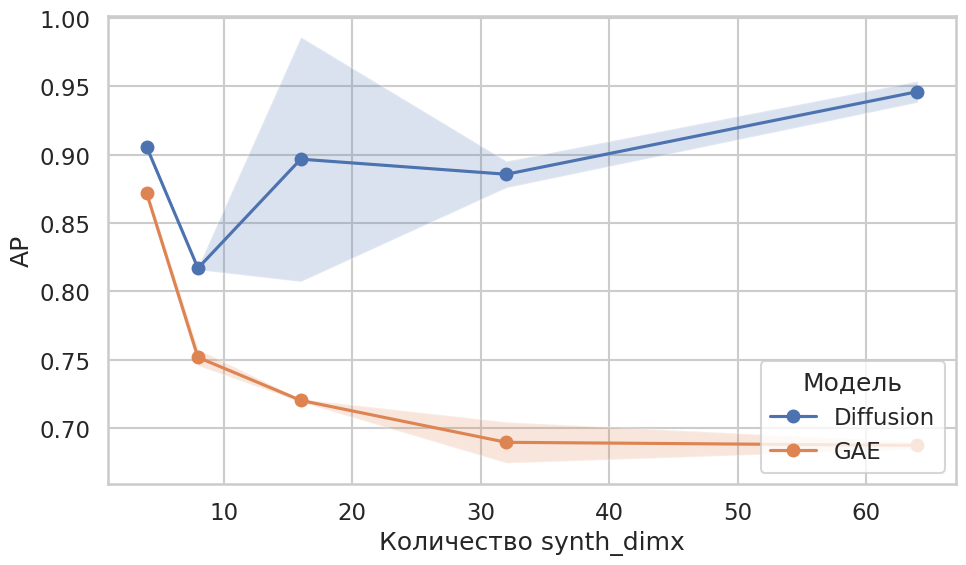

In [64]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

for model in agg_dim["model_name"].unique():
    sub = agg_dim[agg_dim["model_name"] == model]
    
    # Линия среднего
    plt.plot(sub["dataset/num_features"], sub["mean_ap"], marker="o", label=model)
    
    # Область стандартного отклонения
    plt.fill_between(
        sub["dataset/num_features"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )

# plt.title("Зависимость AP от количества вершин графа", fontsize=16)
plt.xlabel("Количество synth_dimx")
plt.ylabel("AP")
plt.legend(title="Модель", loc='lower right')
plt.tight_layout()
plt.savefig('synth_dimx.jpg')
plt.show()

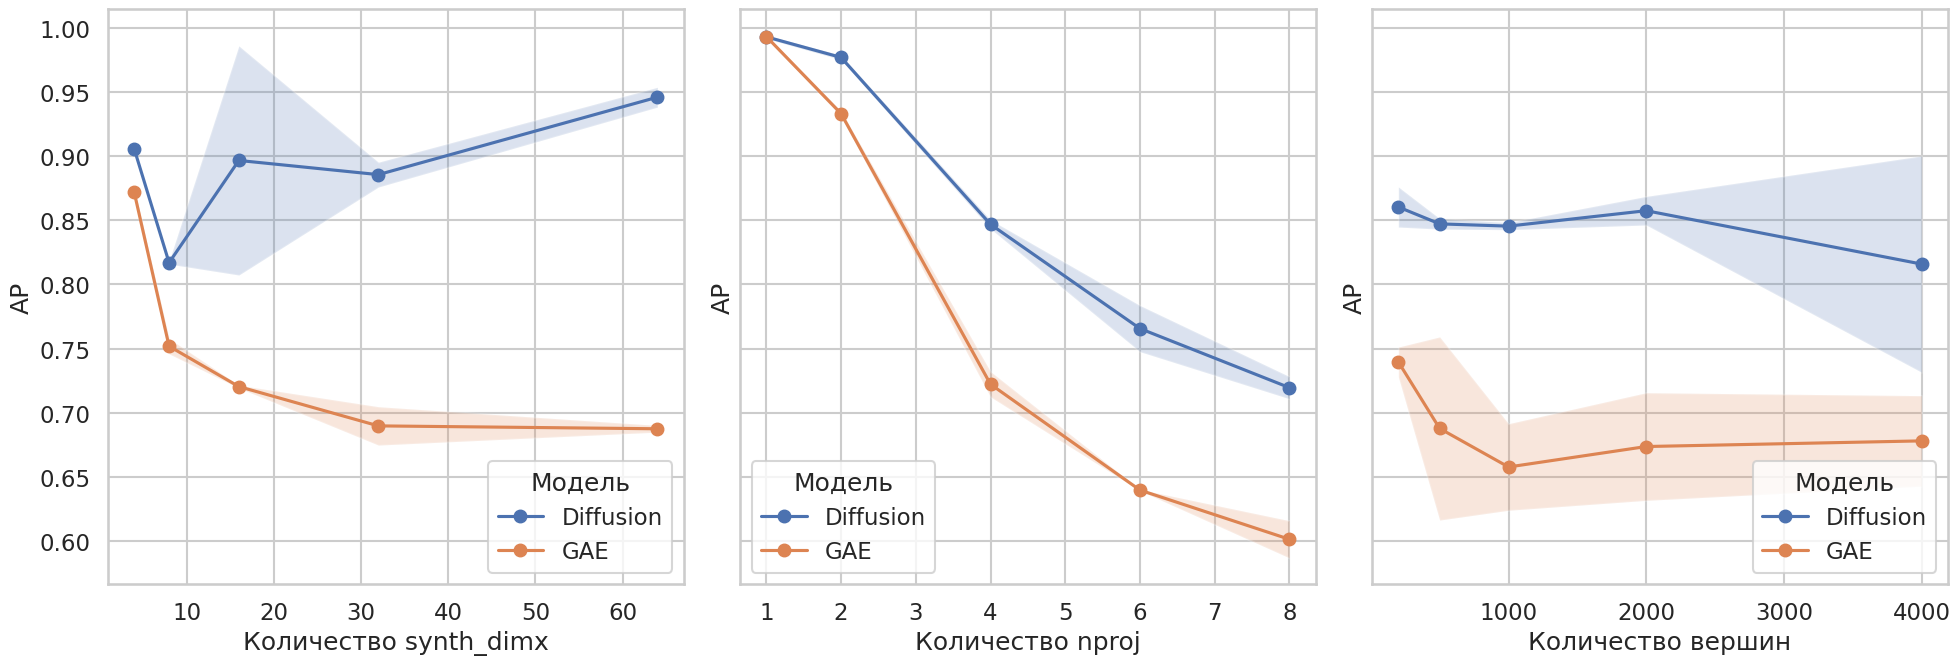

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)  # 1 ряд, 3 колонки

# === Первый график (agg_dim) ===
ax = axes[0]
for model in agg_dim["model_name"].unique():
    sub = agg_dim[agg_dim["model_name"] == model]
    ax.plot(sub["dataset/num_features"], sub["mean_ap"], marker="o", label=model)
    ax.fill_between(
        sub["dataset/num_features"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )
ax.set_xlabel("Количество synth_dimx")
ax.set_ylabel("AP")
ax.legend(title="Модель", loc='lower right')

# === Второй график (agg_nproj) ===
ax = axes[1]
for model in agg_nproj["model_name"].unique():
    sub = agg_nproj[agg_nproj["model_name"] == model]
    ax.plot(sub["dataset/nproj"], sub["mean_ap"], marker="o", label=model)
    ax.fill_between(
        sub["dataset/nproj"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )
ax.set_xlabel("Количество nproj")
ax.set_ylabel("AP")
ax.legend(title="Модель", loc='lower left')

# === Третий график (agg) ===
ax = axes[2]
for model in agg["model_name"].unique():
    sub = agg[agg["model_name"] == model]
    ax.plot(sub["dataset/num_nodes"], sub["mean_ap"], marker="o", label=model)
    ax.fill_between(
        sub["dataset/num_nodes"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )
ax.set_xlabel("Количество вершин")
ax.set_ylabel("AP")
ax.legend(title="Модель", loc='lower right')

plt.tight_layout()
plt.savefig('all_three_plots.jpg', dpi=300)
plt.show()


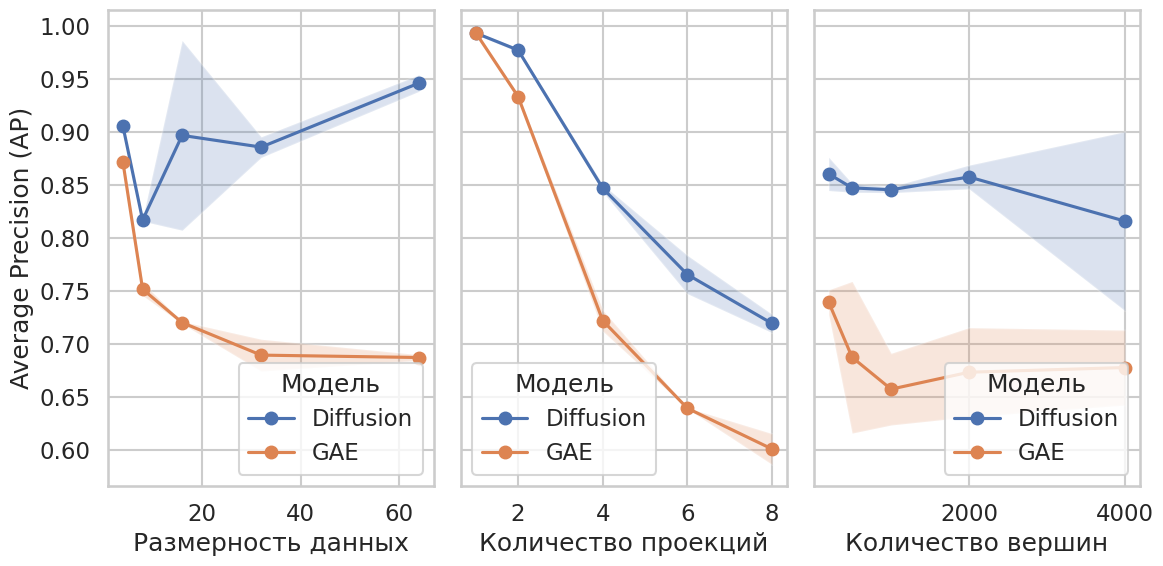

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)  # один ряд, высокие графики

# === Первый график (agg_dim) ===
ax = axes[0]
for model in agg_dim["model_name"].unique():
    sub = agg_dim[agg_dim["model_name"] == model]
    ax.plot(sub["dataset/num_features"], sub["mean_ap"], marker="o", label=model)
    ax.fill_between(
        sub["dataset/num_features"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )
ax.set_xlabel("Размерность данных")
ax.set_ylabel("Average Precision (AP)")
ax.legend(title="Модель", loc='lower right')

# === Второй график (agg_nproj) ===
ax = axes[1]
for model in agg_nproj["model_name"].unique():
    sub = agg_nproj[agg_nproj["model_name"] == model]
    ax.plot(sub["dataset/nproj"], sub["mean_ap"], marker="o", label=model)
    ax.fill_between(
        sub["dataset/nproj"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )
ax.set_xlabel("Количество проекций")
ax.set_ylabel("")  # убираем подпись оси Y
ax.legend(title="Модель", loc='lower left')

# === Третий график (agg) ===
ax = axes[2]
for model in agg["model_name"].unique():
    sub = agg[agg["model_name"] == model]
    ax.plot(sub["dataset/num_nodes"], sub["mean_ap"], marker="o", label=model)
    ax.fill_between(
        sub["dataset/num_nodes"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )
ax.set_xlabel("Количество вершин")
ax.set_ylabel("")  # убираем подпись оси Y
ax.legend(title="Модель", loc='lower right')

# уменьшаем расстояние между графиками
plt.subplots_adjust(wspace=0.15)

plt.tight_layout()
plt.savefig('all_three_plots_compact.jpg', dpi=300)
plt.show()
